<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #1:  Apply initial data analysis </h5>
<h6> NOTE:  Please see README file for extended Section Notes/Documentation </h6>
    <p>(A) Open the file and run initial analysis
    <p>(B) Replace column names
    <p>(C) Convert the data to required types
    <p>(D) Describe the columns whose data types have been changed and why
    <p>(E) If necessary, decide how to deal with missing values
 </div>


In [50]:
#  Section #1 - (A)
import pandas as pd
from scipy import stats as sp
from scipy.stats import ttest_ind
import streamlit as st
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_orig = pd.read_csv('datasets/games.csv')
df_orig.head(10)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [51]:
#  Section #1 - (A) - 1
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [52]:
#  Section #1 - (A) - 2
print('Duplicate Totals: ', df_orig.duplicated().sum())


Duplicate Totals:  0


In [53]:
#  Section #1 - (A) - 3
print('Following is describe(object):')
print(df_orig.describe(include='object'))
print()
print('Following is describe(numeric):')
print(df_orig.describe())

Following is describe(object):
                               Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

Following is describe(numeric):
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000 

In [54]:
#  Section #1 - (A) - 5
df_unique = df_orig['Name']
print(df_unique.unique())


['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [55]:
#  Section #1 - (A) - 5
df_unique = df_orig['Platform']
print(df_unique.unique())


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [56]:
#  Section #1 - (A) - 5
df_unique = df_orig['Year_of_Release']
print(df_unique.unique())
#df_unique.unique().sort_values()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]


In [8]:
#  Section #1 - (A) - 5
df_unique = df_orig['Genre']
print(df_unique.unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [9]:
#  Section #1 - (A) - 5
df_unique = df_orig['Critic_Score']
print(df_unique.unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


In [10]:
#  Section #1 - (A) - 5
df_unique = df_orig['User_Score']
print(df_unique.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [11]:
#  Section #1 - (A) - 5
df_unique = df_orig['Rating']
print(df_unique.unique())


['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [57]:
#  Section #1 - (B) - 1, 2
#  Replace column names and make them lowercase

df_orig.rename(columns=
                {'Name': 'name',
                 'Platform': 'platform',
                 'Year_of_Release': 'year_of_release',
                 'Genre': 'genre',
                 'NA_sales': 'na_sales',
                 'EU_sales': 'eu_sales',
                 'JP_sales': 'jp_sales',
                 'Other_sales': 'other_sales',
                 'Critic_Score': 'critic_score',
                 'User_Score': 'user_score',
                 'Rating': 'rating'
                },
                inplace=True)

df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
df_orig.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
#   NOT ALL MISSING VALUES SHOULD BE FILLED IN, THEY HAVE A STORY TO TELL WHY THEY ARE MISSING VALUES
#   CREATE BAR PLOT TO SEE THE IMPACT - Section #1 - (A) - 4
#   NEXT BLOCK OF CHANGES WILL HELP WITH HOW
df_miss_vals = df_orig.isna().sum().to_frame('miss_values')
df_miss_vals['percent'] = round(df_orig.isna().sum()/len(df_orig), 4)
df_miss_vals = df_miss_vals.sort_values(by='percent', ascending=False)
print(df_miss_vals)

                 miss_values  percent
critic_score            8578   0.5132
rating                  6766   0.4048
user_score              6701   0.4009
year_of_release          269   0.0161
name                       2   0.0001
genre                      2   0.0001
platform                   0   0.0000
jp_sales                   0   0.0000
eu_sales                   0   0.0000
na_sales                   0   0.0000
other_sales                0   0.0000


In [15]:
missing_year = df_orig[df_orig['year_of_release'].isna()]
missing_year.groupby('platform')['name'].count()

platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64      3
PC      17
PS       7
PS2     34
PS3     25
PSP     16
PSV      1
Wii     34
X360    30
XB      21
Name: name, dtype: int64

    year_of_release  count
26           1991.0     41
25           1992.0     43
23           1993.0     60
22           1994.0    121
21           1995.0    219
20           1996.0    263
19           1997.0    289
16           1998.0    379
18           1999.0    338
17           2000.0    350
15           2001.0    482
7            2002.0    829
8            2003.0    775
9            2004.0    762
6            2005.0    939
5            2006.0   1006
3            2007.0   1197
0            2008.0   1427
1            2009.0   1426
2            2010.0   1255
4            2011.0   1136
10           2012.0    653
13           2013.0    544
12           2014.0    581
11           2015.0    606
14           2016.0    502


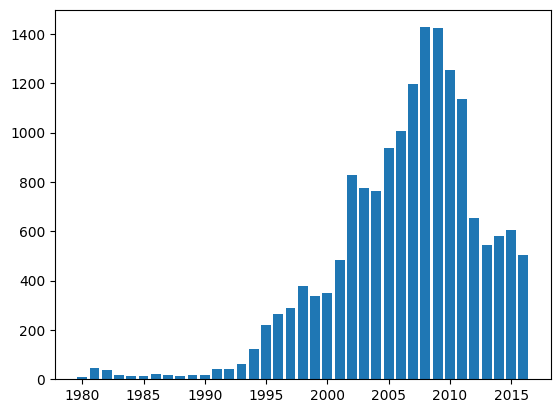

In [58]:
#df_orig.info()
subset = df_orig[~(df_orig['name'].isna())]['year_of_release'].value_counts().reset_index()
#subset = df_orig[df_orig['critic_score'].isna()]['year_of_release'].value_counts().reset_index()
print(subset[subset['year_of_release'] > 1990].sort_values(by='year_of_release').head(35))
plt.bar(subset['year_of_release'], height=subset['count'])
#plt.bar(subset['name'], height=subset['count'])
plt.show()

In [63]:
#  Section #1 - (C) - 1, 2, 3, 4, 5
#  Replace NaN values in "year_of_release", and "TBD" values in "user_score" column by default values
df_orig['year_of_release'] = df_orig['year_of_release'].fillna(1900.0)

df_orig['user_score'] = df_orig['user_score'].replace('tbd', '999')

df_orig['critic_score'] = df_orig['critic_score'].fillna(888.0)
df_orig['user_score'] = df_orig['user_score'].fillna('888')

df_orig['rating'] = df_orig['rating'].fillna('Unknown')

df_unique = df_orig['year_of_release']
print(df_unique.unique())
print()
df_unique = df_orig['rating']
print(df_unique.unique())


[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1900 1995 1991 1981 1987 1980 1983]

['E' 'Unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [64]:
#  Section #1 - (D, E - 1, 2, 3)
#  Convert the data to required types
#  >>  'year_of_release' from FLOAT to INT
#       >>  Year value in datetime type is traditionally numeric and an INT
#  >>   'critic_score' from FLOAT to INT
#       >>  After running UNIQUE(), all non-null values do NOT have fraction values
#  >>   'user_score' from OBJECT to FLOAT
#       >>  After running UNIQUE(), all non-null values have fraction values

df_orig['year_of_release'] = df_orig['year_of_release'].astype('int')

df_orig['critic_score'] = df_orig['critic_score'].astype('int')

df_orig['user_score'] = pd.to_numeric(df_orig['user_score'])

df_orig.info()

df_unique = df_orig['year_of_release']
print(df_unique.unique())
print()
df_unique = df_orig['critic_score']
print(df_unique.unique())
print()
df_unique = df_orig['user_score']
print(df_unique.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1900 1995 1991 1981 1987 1980 1983]

[ 76 888  82  80  89  58  87  91  61

In [76]:
# Add 'tot_sales' and 'na_perc' columns to DF_ORIG 

df_orig['tot_sales'] = df_orig['na_sales'] + df_orig['eu_sales'] + df_orig['jp_sales'] + df_orig['other_sales']
df_orig['na_perc'] = df_orig['na_sales'] / df_orig['tot_sales']

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
<h6> NOTE:  Please see README file for Summary/Documentation </h6>
  <p>(A) Games released in different years
  <p>==>>  (1) Years below 1993 are not as significant as the rest of the years.  Years 2005 through 2011 are the most competetive.
 </div>

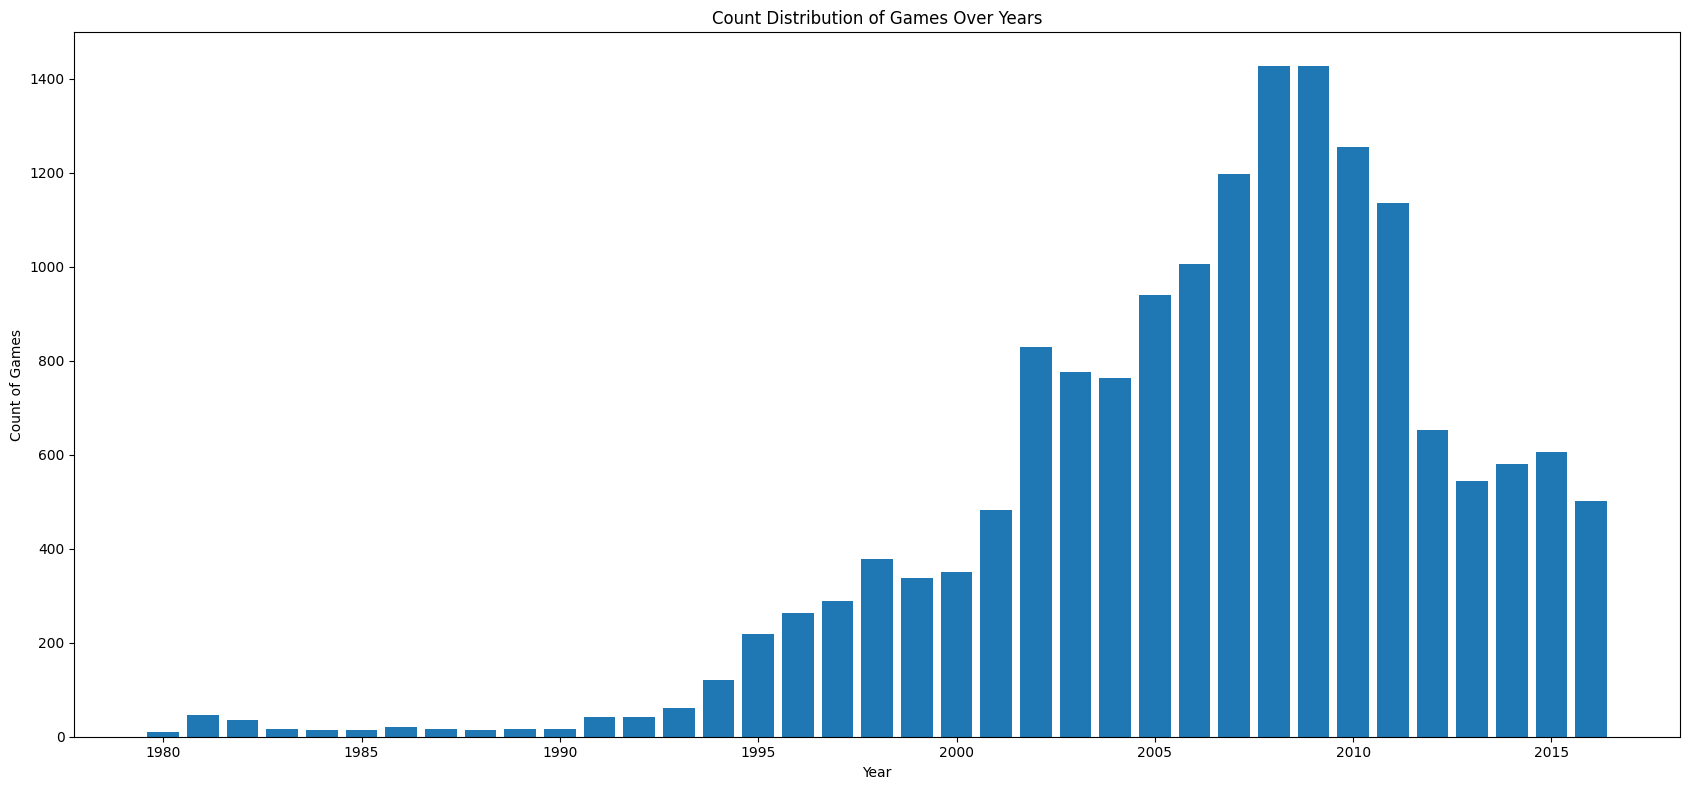

In [77]:
# Section #3 - (A-1)
# Group by 'year_of_release', plot COUNT of 'name' by 'year_of_release'
df_groupby_year = df_orig.groupby('year_of_release')['year_of_release'].value_counts().reset_index()

df_result = df_groupby_year.query('year_of_release > 1900')

plt.figure(figsize=(17, 8))
plt.bar(df_result['year_of_release'], df_result['count'])  
plt.title('Count Distribution of Games Over Years')
plt.xlabel('Year')
plt.ylabel('Count of Games')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
<h6> NOTE:  Please see README file for extended Section Notes/Documentation </h6>
    <p>(B) Platform to platform sales distribution 
    <p>==>>  (1) Display Platforms in descending Platform Sales order (Top 6:  PS2, X360, PS3, Wii, DS, PS)
    <p>==>>  (2) Based on the top 6 Platforms, it takes between 1 - 4 years to cycle from new to faded for the OLDER year platforms
    <p>==>>  (3) Based on the top 6 Platforms, it takes between 9 - 11 years to cycle from new to faded for the MORE RECENT years
   </div>

C:\Users\pamad\AppData\Local\Temp\ipykernel_8644\1578410277.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')


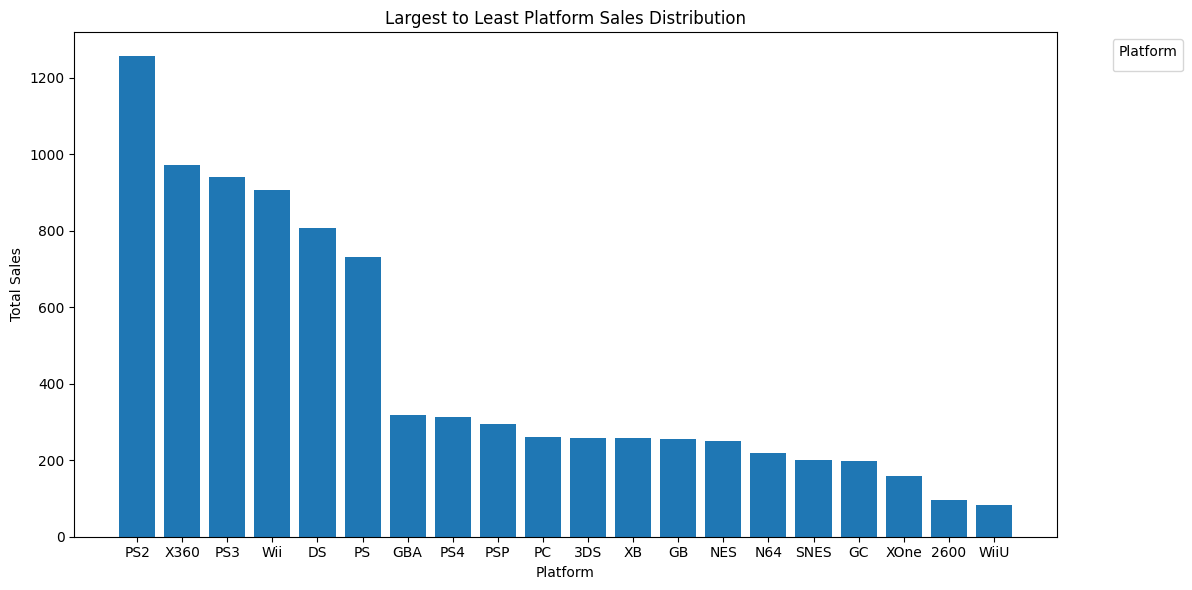

In [78]:
# Section #3 - (B-1) - Platform Total Sales Distribution in descending order
df_groupby_plat = df_orig.groupby('platform')['tot_sales'].sum().reset_index()

df_best_platforms = df_groupby_plat.nlargest(20, 'tot_sales')

plt.figure(figsize=(12, 6))
plt.bar(df_best_platforms['platform'], df_best_platforms['tot_sales'])  
plt.title('Largest to Least Platform Sales Distribution')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

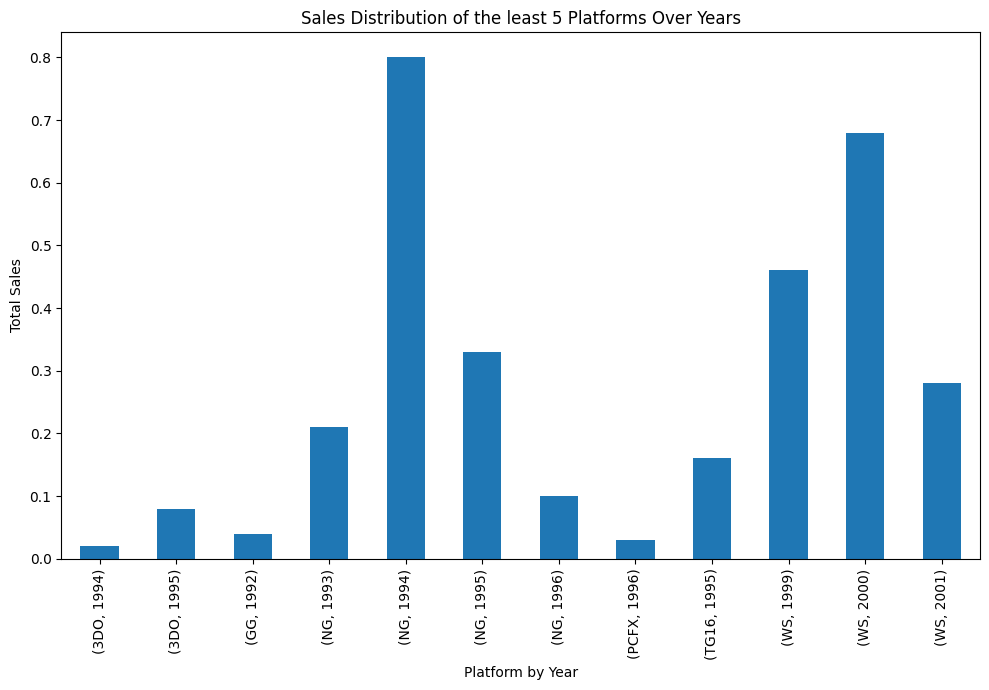

In [79]:
# Section #3 - (B-2) - Platform to Platform Sales Distribution (for OLDER Years)
df_groupby_plat = df_orig.groupby('platform')['tot_sales'].sum().sort_values()       #.reset_index()

# Find the least 6 Platform Sales
df_best_platforms = df_groupby_plat.nsmallest(6).index

# Total Sales for each Platform by Year
df_best_byyear = df_orig[(df_orig['platform'].isin(df_best_platforms)) & (df_orig['year_of_release'] > 1900)].groupby(['platform', 'year_of_release'])['tot_sales'].sum()

plt.figure(figsize=(10, 7))
df_best_byyear.T.plot(kind='bar', stacked=True)
plt.title('Sales Distribution of the least 5 Platforms Over Years')
plt.xlabel('Platform by Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

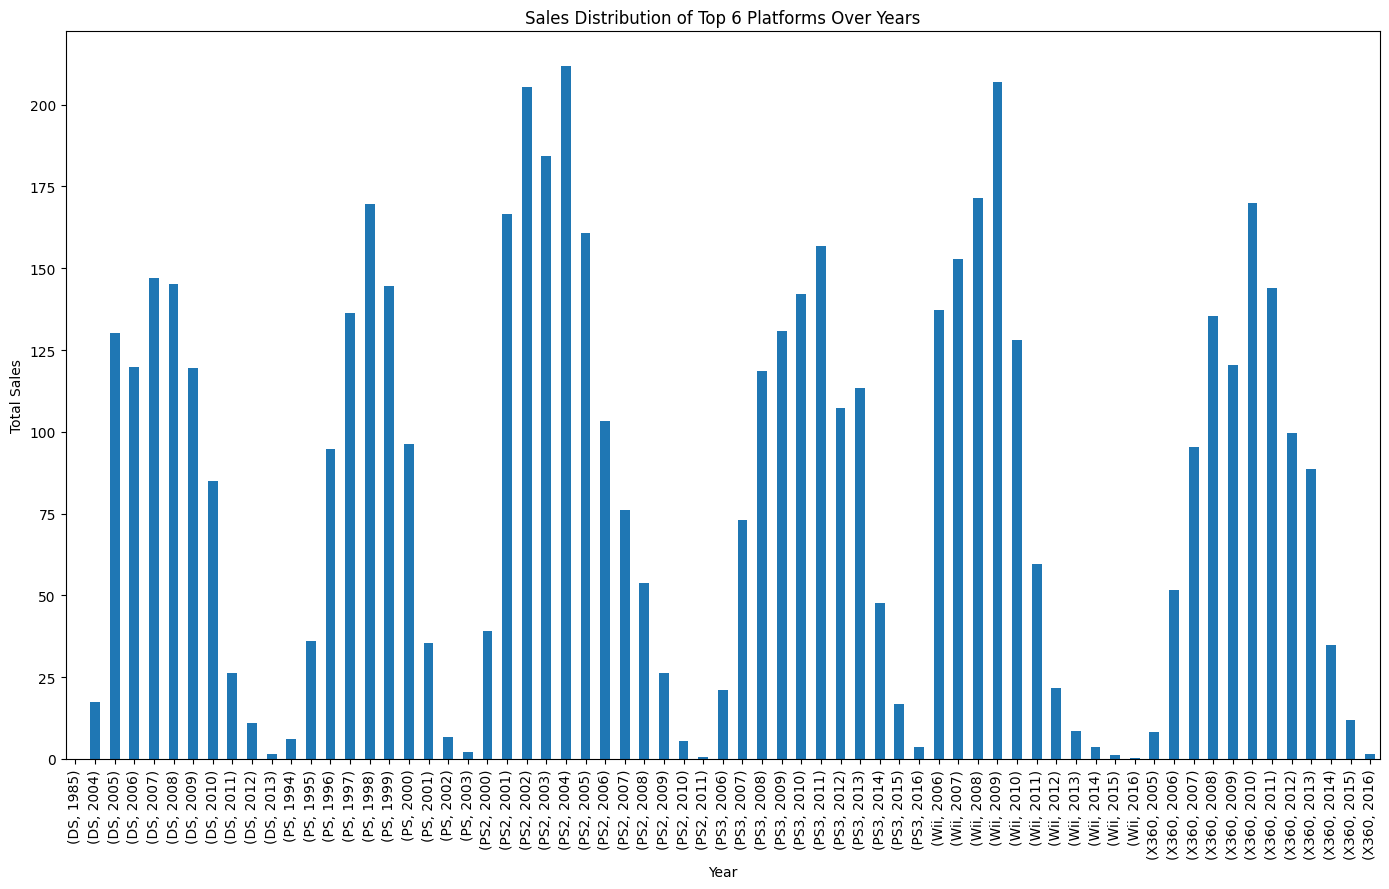

In [80]:
# Section #3 - (B-3) - Total Sales by Platform Sales Distribution (RECENT YEARS)

df_groupby_plat = df_orig.groupby('platform')['tot_sales'].sum().sort_values(ascending=False)

# Find the top 6 Platform Sales
df_best_platforms = df_groupby_plat.nlargest(6).index

# Total Sales for each Platform by Year
df_best_byyear = df_orig[(df_orig['platform'].isin(df_best_platforms)) & (df_orig['year_of_release'] > 1900)].groupby(['platform', 'year_of_release'])['tot_sales'].sum()

plt.figure(figsize=(14, 9))
df_best_byyear.T.plot(kind='bar', stacked=True)
plt.title('Sales Distribution of Top 6 Platforms Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
<h6> NOTE:  Please see README file for extended Section Notes/Documentation </h6>
      <p>(C, D) Determine what period to take data for, disregard data for previous years
    <p>==>>  (1) Since the game cycle trend is between 9 - 11 years, the years to use will be 2012 - 2016 (2017 - 5 [growth cycle midpoint] = 2012)
  </div>

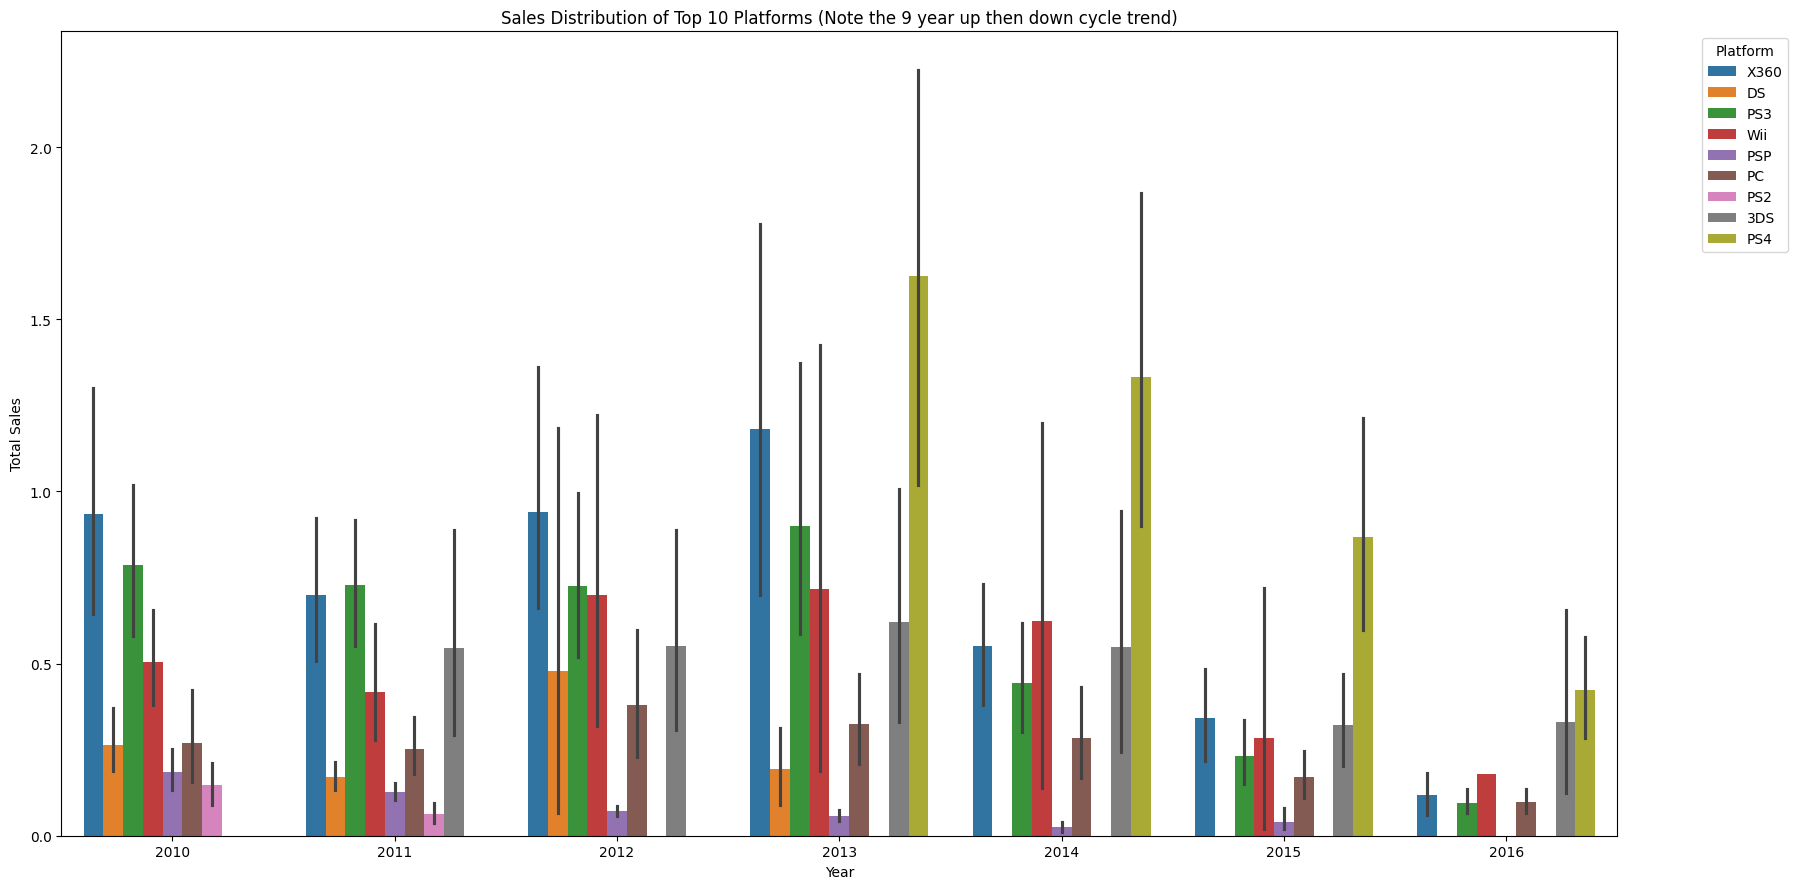

In [81]:
# PKA #2 Section #3 - (C, D) - Determine what Year of Release Period to use

df_groupby_plat = df_orig.groupby('platform')['tot_sales'].sum().sort_values(ascending=False)       

# Find the top 10 - 15 Platform Sales (NOTE:  'year_of_release' is filtered >= 2010)
df_best_platforms = df_groupby_plat.nlargest(15).index

# Total Sales for each TOP Platform by Year
df_best_byyear = df_orig[(df_orig['platform'].isin(df_best_platforms)) & (df_orig['year_of_release'] >= 2010)]

plt.figure(figsize=(18, 9))
sns.barplot(data=df_best_byyear, x='year_of_release', y='tot_sales', hue='platform')
plt.title('Sales Distribution of Top 10 Platforms (Note the 9 year up then down cycle trend)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
    <p>(E) Which platforms are leading in sales? Which ones are growing or shrinking?
    <p>==>>  Based on the bar plot, the top 3 Platforms in this year range (2012 - 2016) are PS4, PS3, X360
    <p>==>>  Based on the bar plot, the 2 Platforms in decline in this year range (2012 - 2016) are PSP, Wii
    <p>(F) Build a box plot for the global sales of all games, broken down by platform.
    <p>==>>  Two box plots have been created, Sales Distribution between 2012 - 2016 by Platform and by Year of Release
    </div>

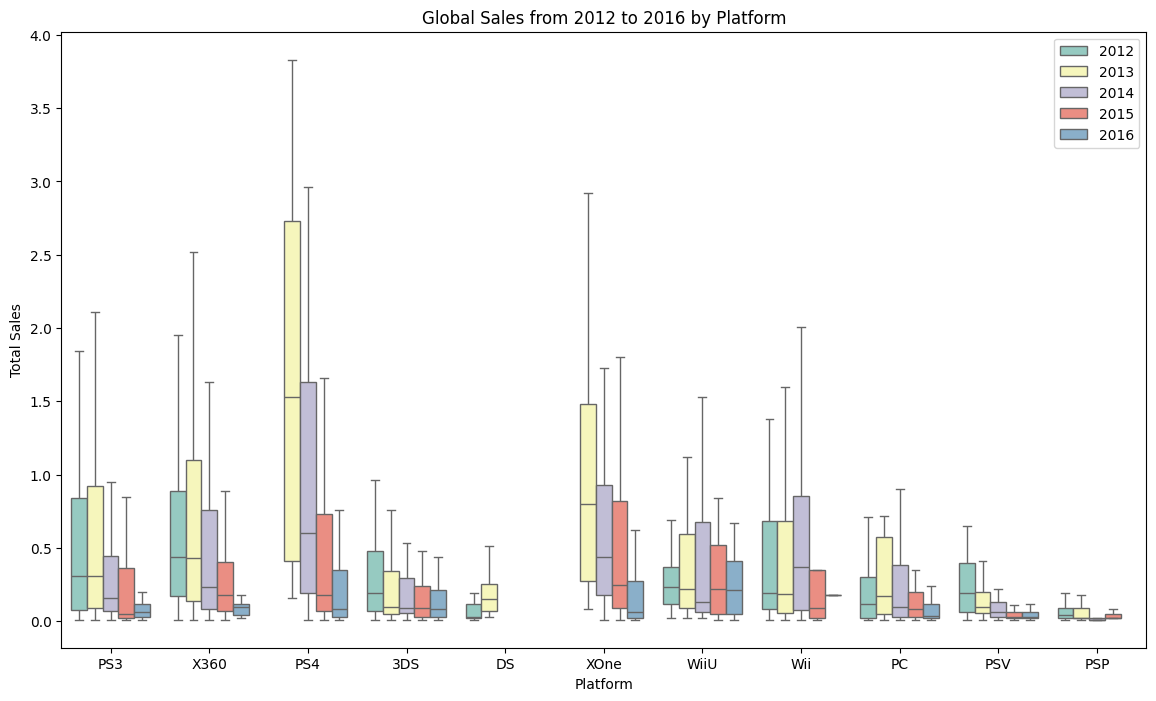

In [91]:
# Section #3 - (E) - Box Plot for the global sales of all games, broken down by Platform

df_boxplot_subset = df_orig[(df_orig['year_of_release'] >= 2012) & (df_orig['year_of_release'] <= 2016)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_boxplot_subset, x='platform', y='tot_sales', hue='year_of_release', palette='Set3', showfliers=False)
plt.title('Global Sales from 2012 to 2016 by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

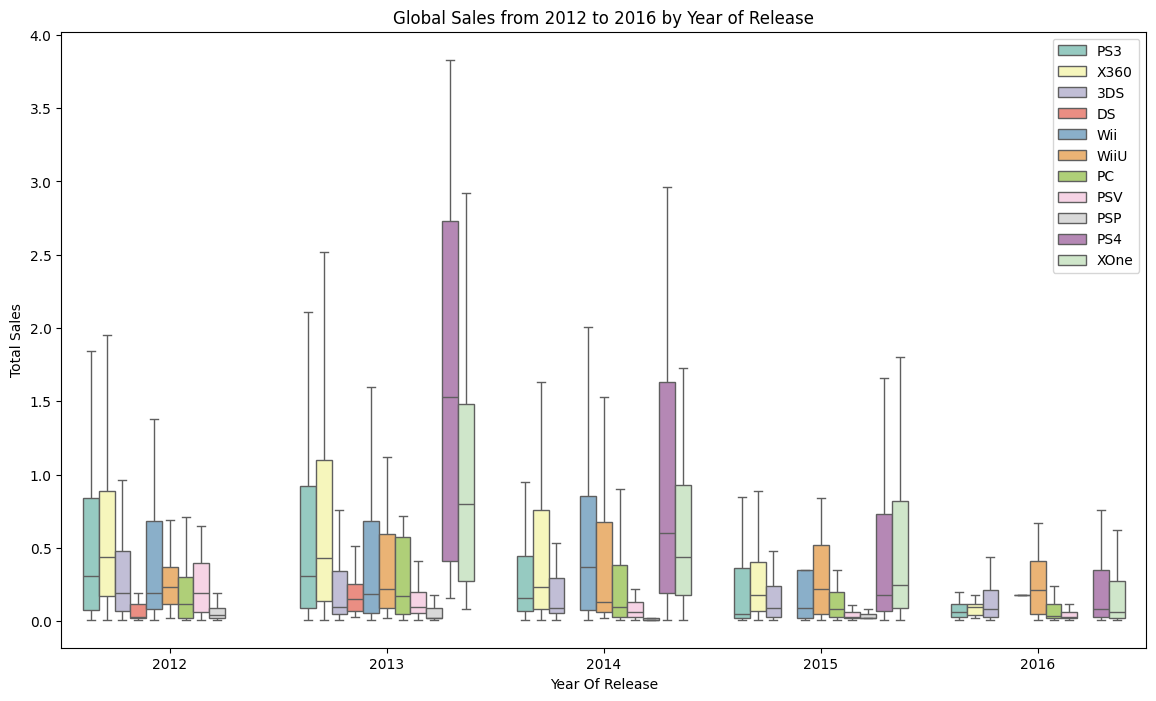

In [27]:
# Section #3 - (F) - Box Plot for the global sales of all games, broken down by Year of Release

df_boxplot_subset = df_orig[(df_orig['year_of_release'] >= 2012) & (df_orig['year_of_release'] <= 2016)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_boxplot_subset, x='year_of_release', y='tot_sales', hue='platform', palette='Set3', showfliers=False)
plt.title('Global Sales from 2012 to 2016 by Year of Release')
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
<h6> NOTE:  Please see README file for extended Section Notes/Documentation </h6>
     <p>(G) Build a scatter plot and calculate the correlation between reviews and sales
    <p>    (how do user and professional reviews affect sales for one popular platform)
    <p>==>>  Results from PS4 correlation between critic/user scores and sales indicate little or no linear relationship (-0.13 for both calculations)
  </div>

C:\Users\pamad\AppData\Local\Temp\ipykernel_8644\1035289986.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


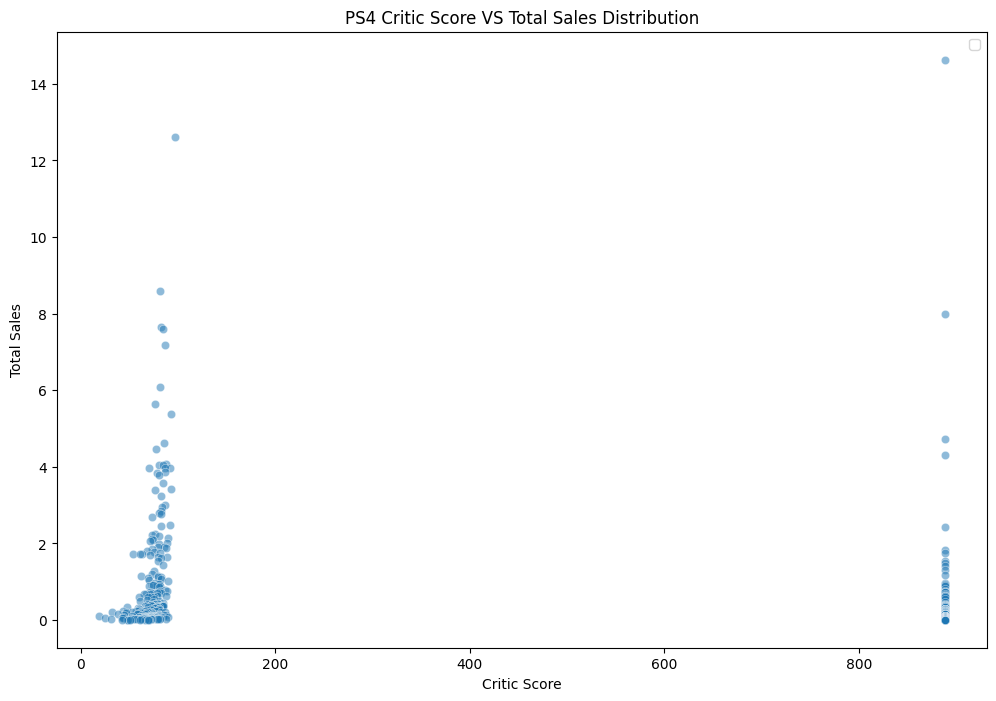

In [29]:
# Section #3 - (G) - Scatter Plot between Critic Scores and Total Sales

df_criticscores_subset = df_orig[(df_orig['platform'] == 'PS4')]  # & (df_orig['year_of_release'] >= 2012) & (df_orig['year_of_release'] <= 2016)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_criticscores_subset, x='critic_score', y='tot_sales', alpha=0.5)
plt.title('PS4 Critic Score VS Total Sales Distribution')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

C:\Users\pamad\AppData\Local\Temp\ipykernel_8644\3146075054.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


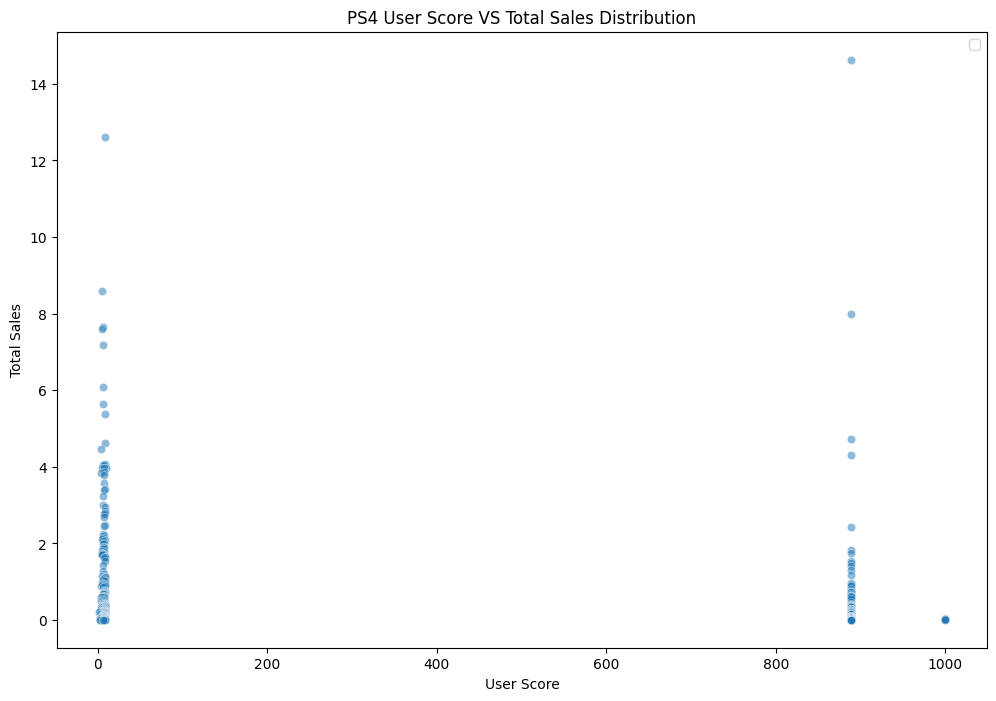

In [30]:
# Section #3 - (G) - Scatter Plot between User Scores and Total Sales

df_userscores_subset = df_orig[(df_orig['platform'] == 'PS4')]  # & (df_orig['year_of_release'] >= 2012) & (df_orig['year_of_release'] <= 2016)]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_userscores_subset, x='user_score', y='tot_sales', alpha=0.5)
plt.title('PS4 User Score VS Total Sales Distribution')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [31]:
# Section #3 - (G) - Correlation calculation between Critic/User Score and Total Sales

criticscore_corr = df_criticscores_subset['critic_score'].corr(df_criticscores_subset['tot_sales'])

userscore_corr = df_userscores_subset['user_score'].corr(df_userscores_subset['tot_sales'])

display(f'Correlation between Critic Score and Total Sales: {criticscore_corr:.2f}')
display(f'Correlation between User Score and Total Sales: {userscore_corr:.2f}')


'Correlation between Critic Score and Total Sales: -0.13'

'Correlation between User Score and Total Sales: -0.13'

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
    <p>(H) Compare the sales of the same games on other platforms
    <p>==>>  Two other Platforms produced higher Sales for the same top 20 Game Names (X360 and PS3)
 </div>

<Figure size 800x600 with 0 Axes>

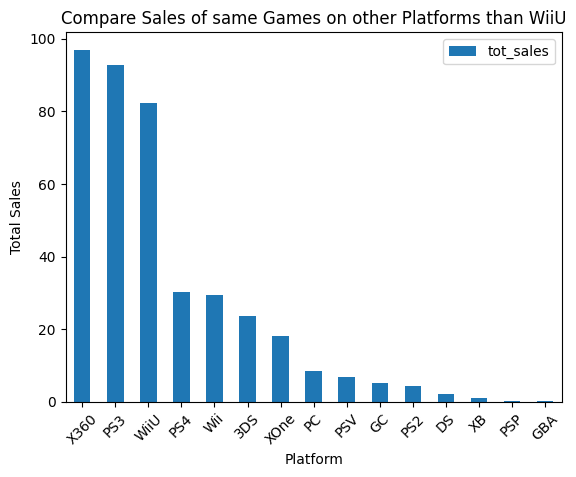

In [32]:
# Section #3 - (H) - Compare the sales of the same games on other platforms

#Find other Platforms that share the same Game Names as WiiU Game Names
df_wiiu_platform = df_orig[df_orig['platform'] == 'WiiU']
df_game_names = df_wiiu_platform['name'].unique()
df_multi_plat_games = df_orig[df_orig['name'].isin(df_game_names)]

#Pivot to make Platforms the columns, then sum the Total Sales of Game Names by Platform
df_pivot = df_multi_plat_games.pivot_table(index='platform', values='tot_sales', aggfunc='sum')

#Plot only the top 20 games for good view
df_top_games = df_pivot.sum(axis=1).nlargest(20).index
df_pivot = df_pivot.loc[df_top_games]

#Plot the pivoted data
plt.figure(figsize=(8, 6))
df_pivot.plot(kind='bar')
plt.title('Compare Sales of same Games on other Platforms than WiiU')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #3:  Analyze the data </h5>
    <p>(I) Take a look at the general distribution of games by genre
    <p>==>>  The top 4 sales by genre are Action, Shooter, Role-Playing and Sports
    <p>==>>  Action and Shooter genres are popular in younger game players, marketing to a younger age group is successful in these genres
    <p>==>>  The lower sale genres seem to be for 'custom' audiences with specific interests (e.g. Puzzle, Strategy)
 </div>

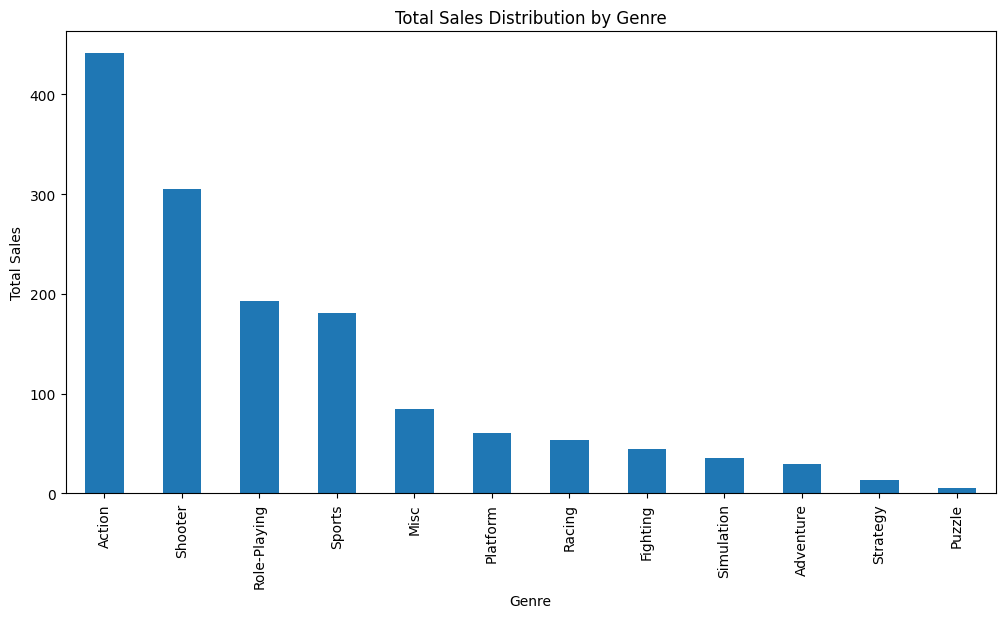

In [33]:
# Section #3 - (I) - Take a look at the general distribution of games by genre

#Sales by Genre (df_new_subset = 2012 - 2016)
df_sales_bygenre = df_new_subset.groupby('genre')['tot_sales'].sum().sort_values(ascending=False)

#Plot the Sales Distribution
# Plot
plt.figure(figsize=(12, 6))
df_sales_bygenre.plot(kind='bar')
plt.title('Total Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #4:  User Profile for each Region </h5>
    <p>(A) Top 5 Platforms. Describe variations in their market shares from region to region
    <p>=>>  (1) All 3 regions have the same top 5 Platforms (X360, PS4, PS3, XOne, 3DS), except X360 was replaced by WiiU in JP region
    <p>=>>  (2) The top Platforms are evenly aligned across all regions, all regions like the same top Platforms.
    <p>(B) Explain the difference between the top five genres
    <p>=>>  (1) The first 4 genres are the same for NA and EU regions.
    <p>=>>  (2) These two regions may culturally be interested in the same type of game activities.
    <p>=>>  (3) The JP region ratings seem to be focused on completely different interests, perhaps aligned more with the regions' cultural interests.
    <p>(C) Do ESRB ratings affect sales in individual regions?
    <p>=>>  (1) Except for the 'Unknown' rating, all the JP region ratings are overwhelmingly lower than the other regions.
    <p>=>>  (2) It's possible that the JP region is culturally not interested in participating in rated games.    
 </div>

In [34]:
# Section #4 - (A) - Top 5 Platforms. Describe variations in their market shares.

df_regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in df_regions:
    df_top_platforms = df_new_subset.groupby('platform')[region].sum().nlargest(5)
    display(f"Top 5 Platforms in {region[:-6]}:")
    display(df_top_platforms)
 

'Top 5 Platforms in na:'

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

'Top 5 Platforms in eu:'

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

'Top 5 Platforms in jp:'

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

In [35]:
# Section #4 - (B) - Top 5 Genres. Describe variations in their market shares.

for region in df_regions:
    df_top_genres = df_new_subset.groupby('genre')[region].sum().nlargest(5)
    display(f"Top Genres in {region[:-6]}:")
    display(df_top_genres)
 

'Top Genres in na:'

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

'Top Genres in eu:'

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

'Top Genres in jp:'

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

In [36]:
# Section #4 - (C) - ESRB ratings in individual regions. Describe variations in their market shares.

for region in df_regions:
    df_rating_sales = df_new_subset.groupby('rating')[region].sum()
    display(f"ESRB ratings in {region[:-6]}:")
    display(df_rating_sales)
 

'ESRB ratings in na:'

rating
E          114.37
E10+        75.70
M          231.57
T           66.02
Unknown    103.31
Name: na_sales, dtype: float64

'ESRB ratings in eu:'

rating
E          113.03
E10+        55.37
M          193.96
T           52.96
Unknown     91.50
Name: eu_sales, dtype: float64

'ESRB ratings in jp:'

rating
E           28.33
E10+         8.19
M           21.20
T           26.02
Unknown    108.84
Name: jp_sales, dtype: float64

<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Section #5:  Test the Hypotheses </h5>
<h6> NOTE:  Please see README file for extended Section Notes/Documentation </h6>
    <p>(A) Average user ratings of the Xbox One and PC platforms are the same.
    <p>=>>  (1) There is a difference in the user ratings between XOne and PC Platforms.
    <p>=>>  (2) Some users prefer one platform over the other.
    <p>(B) Average user ratings for the Action and Sports genres are different.
    <p>=>>  (1) The user ratings for Action and Sports genres are similar.
    <p>=>>  (2) The users do not differentiate too much between the two genres.
   </div>

In [42]:
# Test Hypotheses: Average user ratings of the Xbox One and PC platforms are the same.
# User Scores for XOne and PC
df_xbox_ratings = df_new_subset[df_new_subset['platform'] == 'XOne']['user_score'].dropna()
df_pc_ratings = df_new_subset[df_new_subset['platform'] == 'PC']['user_score'].dropna()

# Perform test
t_stat, p_value = ttest_ind(df_xbox_ratings, df_pc_ratings, equal_var=False)

# Print values
display(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("H0 Reject the hypotheses: Average user ratings of the Xbox One and PC platforms are the same.")
else:
    print("H1 Cannot Reject: Average user ratings of the Xbox One and PC platforms are significantly different.")

'T-statistic: 2.3930, P-value: 0.0171'

H0 Reject the hypotheses: Average user ratings of the Xbox One and PC platforms are the same.


In [47]:
# Test Hypotheses: Average user ratings for the Action and Sports genres are different.
# User Ratings for Action and Sports genres
df_action_ratings = df_new_subset[df_new_subset['genre'] == 'Action']['user_score'].dropna()
df_sports_ratings = df_new_subset[df_new_subset['genre'] == 'Sports']['user_score'].dropna()

# Perform test
t_stat, p_value = ttest_ind(df_action_ratings, df_sports_ratings, equal_var=False)

# Print values
display(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("H0 Reject the hypotheses: Average user ratings for the Action and Sports genres are different.")
else:
    print("H1 Cannot Reject the Hypotheses: Average user ratings for the Action and Sports genres are not different")

'T-statistic: 6.7516, P-value: 0.0000'

H0 Reject the hypotheses: Average user ratings for the Action and Sports genres are different.
